# S09T02 - Aprenentatge Supervisat - Regressions
Anem a practicar i a familiaritzar-nos amb regressions

## - Exercici 1
Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#loading the data
delays2 = pd.read_csv(r'delayed2.csv')

delays2.drop("Unnamed: 0", inplace=True, axis=1)
delays2 = delays2.sample(5000, random_state=42)
print(delays2.shape)
delays2.sample(5, random_state=42)

(5000, 95)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,ArrDelay
145858,1.396170,-1.390386,-0.225042,0.314900,-0.310098,0.302304,-0.539102,0.604565,-0.227979,-0.632107,...,0.052815,-0.015256,-0.058390,-0.038548,0.028782,0.035852,-0.033341,-0.041798,-0.090094,0.0
254707,-0.469036,-0.022620,0.788008,-1.509076,0.581078,2.479393,-0.539447,0.668152,0.722224,0.296248,...,0.032493,-0.049213,-0.014651,0.013967,-0.015821,0.000173,0.005804,0.004079,0.026587,155.0
364029,1.068420,-0.744484,1.447697,-1.043943,-1.353481,-0.451649,-0.442154,-0.875133,-0.142325,-0.257361,...,-0.044038,0.049780,-0.015410,-0.024216,0.009596,0.019788,0.005140,0.000538,-0.062790,7.0
479783,0.514075,-0.304216,-0.653846,1.329317,0.043758,1.506721,0.772544,0.206381,0.777402,0.161538,...,0.019218,0.001648,0.013079,-0.013701,0.008458,-0.005067,0.002248,-0.025791,-0.007057,64.0
492759,-2.739870,-0.626060,-0.358018,1.640876,0.072447,0.014453,0.777914,0.139016,-0.231007,-0.793044,...,-0.055241,0.108305,0.081344,-0.188451,0.134585,-0.044350,-0.034887,0.060972,0.004642,7.0


## - Linear Regression

In [2]:
#Steps 1 and 2: Import packages and classes, and provide data
y = delays2["ArrDelay"]
X = delays2.loc[:, delays2.columns != 'ArrDelay']

#splitting between test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#Step 3: Create a model and fit it
model = LinearRegression().fit(X_train, y_train)

#Step 4: Get results
r_sq1 = model.score(X_test, y_test)
print('coefficient of determination:', r_sq1)
print('intercept:', model.intercept_)
print('slope:', model.coef_[:3])
    
#Step 5: Predict response
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.9949473147976851
intercept: 42.85081941557185
slope: [ 1.03467781 33.38164827 18.29006294]
predicted response:
[ 2.04256409 10.96782449 -9.24262106 ... -2.58609038 17.17515707
 -3.94350616]


99% R2. This high accuracy score of our model suggests that our regressive model has fitted very well to the existing data. This suggests that our data is very suitable for linear regression.<br>
We are now confident enough to use this model to predict target attributes based on new inputs:

In [3]:
o = delays2.loc[492759][:-1].array.reshape(1, -1)
y_pred = model.predict(o)
print("Predicted ArrDelay: ", round(y_pred[0],2))

Predicted ArrDelay:  8.11


/Users/paullarripa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
lr_pred = model.predict(X_test)
pred = pd.DataFrame({'Actual':y_test, 'Prediction': lr_pred, 'Delta':round(model.predict(X_test)-y_test,2)})
pred.sample(5, random_state=42)

,Actual,Prediction,Delta
225670,39.0,42.909116,3.91
137228,0.0,1.769138,1.77
460891,8.0,12.423822,4.42
121832,29.0,29.558092,0.56
457168,4.0,4.522003,0.52


As we can observe, the accuracy is very high on predicting the ArrDelay.

## - Decision Tree

In [5]:
#1 Importing the libraries
#2 Importing the dataset

#Steps 1 and 2: Import packages and classes, and provide data
y = delays2["ArrDelay"]
X = delays2.loc[:, delays2.columns != 'ArrDelay']
#splitting between test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#3 Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
model = regressor.fit(X_train, y_train)

#Step 4: Get results
r_sq2 = model.score(X_test, y_test)
print('coefficient of determination:', r_sq2)

coefficient of determination: 0.8411995186678505


The accuracy of the model is quite high (80%) but a bit lower than the Linear Regression model. Nevertheless, we'll see how the model performs on predicting the target when inputting new data:

In [6]:
#5 Predicting a new result
o = delays2.loc[492759][:-1].array.reshape(1, -1)
y_pred = model.predict(o)
print("Predicted ArrDelay: ", round(y_pred[0],2))

Predicted ArrDelay:  7.0


/Users/paullarripa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [7]:
dt_pred = model.predict(X_test)
pred = pd.DataFrame({'Actual':y_test, 'Prediction': dt_pred, 'Delta':round(model.predict(X_test)-y_test,2)})
pred.sample(5, random_state=42)

,Actual,Prediction,Delta
137625,138.0,150.0,12.0
23237,314.0,351.0,37.0
303173,81.0,63.0,-18.0
125007,30.0,22.0,-8.0
217589,28.0,41.0,13.0


The accuracy with this model is still high, although it's a bit lower than the Linear Regression. <br>Let's now deep dive a bit more on detail and learn about the importance of each feature in the correlations:

## - Random Forest

In [8]:
#6-Train model
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

#7-Make predictions on the test set
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'ArrDelay minutes.')

rf_pred=predictions

Mean Absolute Error: 9.3 ArrDelay minutes.


In [9]:
pred = pd.DataFrame({'Actual':y_test, 'Prediction':model.predict(X_test), 
                     'Delta':round(model.predict(X_test)-y_test,2)})
pred.sample(5, random_state=42)

,Actual,Prediction,Delta
137625,138.0,150.0,12.0
23237,314.0,351.0,37.0
303173,81.0,63.0,-18.0
125007,30.0,22.0,-8.0
217589,28.0,41.0,13.0


In [10]:
print("Accuracy of model: ",predictions.mean()/y_test.mean())

Accuracy of model:  0.9679214588020579


Technically the model with better performance is the Random Forest with a 99% of accuracy. However, we can stil compare the models in a different way. 

## - Exercici 2
Compara’ls en base al MSE i al R2 .
### - Linear Regression

In [11]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, lr_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, lr_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, lr_pred)),2))

Mean Absolute Error: 50.41
Mean Squared Error: 6064.24
Root Mean Squared Error: 77.87


### - Decision Tree

In [12]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, dt_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, dt_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, dt_pred)),2))

Mean Absolute Error: 14.1
Mean Squared Error: 487.6
Root Mean Squared Error: 22.08


### - Random Forest

In [13]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, rf_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, rf_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, rf_pred)),2))

Mean Absolute Error: 9.3
Mean Squared Error: 239.51
Root Mean Squared Error: 15.48


## - Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten.

### - Linear Regression
We'll change the parameter 'fit_intercept' to False so it doesn't get the intercept for this model. 

In [14]:
model = LinearRegression(fit_intercept = False)      #main change
model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)
print("Score test/score train: ", score_test,score_train)
model.intercept_

Score test/score train:  0.3823597003985769 0.4223477580840651


0.0

In [15]:
#Predicting with new values
lr_pred2 = model.predict(X_test)
pd.DataFrame({'Actual':y_test, 'Predicted':lr_pred2}).sample(5, random_state=42)

,Actual,Predicted
137625,138.0,100.710584
23237,314.0,282.859008
303173,81.0,39.361834
125007,30.0,-9.780707
217589,28.0,-13.447009


In [16]:
print('Old Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))
print('Old Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))
print('Old Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print("")
print('New Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred2))
print('New Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred2))
print('New Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred2)))

Old Mean Absolute Error: 50.41235711575513
Old Mean Squared Error: 6064.238147416372
Old Root Mean Squared Error: 77.87321842210179

New Mean Absolute Error: 42.66242675791285
New Mean Squared Error: 1896.487054699384
New Root Mean Squared Error: 43.54867454583875


We can clearly see that the model's accuracy is worse now with the intercept not getting implemented. However the error means have been reduced a little.
### - Decision Tree

Changing <b>max_depth</b> (range 1-50) and assessing its impact on the MAE of train and test sets:

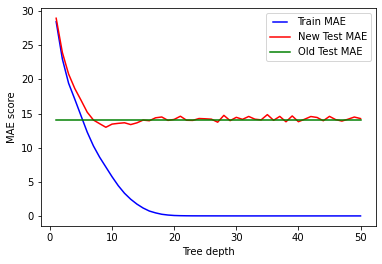

In [17]:
max_depths = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
test_results_dt_pred = []

for max_depth in max_depths:
    dt = DecisionTreeRegressor(max_depth=max_depth)     #main change
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    
    train_results.append(metrics.mean_absolute_error(y_train, train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(metrics.mean_absolute_error(y_test, y_pred))
    test_results_dt_pred.append(metrics.mean_absolute_error(y_test, dt_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train MAE')
line2, = plt.plot(max_depths, test_results, 'r', label='New Test MAE')
line3, = plt.plot(max_depths, test_results_dt_pred, 'g', label='Old Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('Tree depth')
plt.show()

Changing <b>min_samples_split</b> (range 0.1-1) and assessing its impact on the MAE of train and test sets:

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


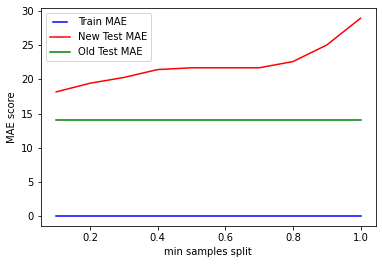

In [18]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
print(min_samples_splits)
train_results = []
test_results = []
test_results_dt_pred = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeRegressor(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    
    train_results.append(metrics.mean_absolute_error(y_train, train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(metrics.mean_absolute_error(y_test, y_pred))
    test_results_dt_pred.append(metrics.mean_absolute_error(y_test, dt_pred))
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train MAE')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='New Test MAE')
line3, = plt.plot(min_samples_splits, test_results_dt_pred, 'g', label='Old Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('min samples split')
plt.show()

Changing the <b>min_samples_leaf</b> parameter range to 0.01-0.5 and assessing its impact on the MAE of train and test sets:

[0.001      0.02726316 0.05352632 0.07978947 0.10605263 0.13231579
 0.15857895 0.18484211 0.21110526 0.23736842 0.26363158 0.28989474
 0.31615789 0.34242105 0.36868421 0.39494737 0.42121053 0.44747368
 0.47373684 0.5       ]


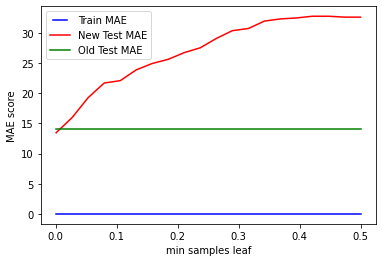

In [19]:
min_samples_leafs = np.linspace(0.001, 0.5, 20, endpoint=True)

print(min_samples_leafs)
train_results = []
test_results = []
test_results_dt_pred = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    
    train_results.append(metrics.mean_absolute_error(y_train, train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(metrics.mean_absolute_error(y_test, y_pred))
    test_results_dt_pred.append(metrics.mean_absolute_error(y_test, dt_pred))
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train MAE')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='New Test MAE')
line3, = plt.plot(min_samples_leafs, test_results_dt_pred, 'g', label='Old Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('min samples leaf')
plt.show()

Trying one last thing to improve the model which is setting the <b>max_depth</b> parameter to 15 and leaving <b>min_samples_leaf</b> and <b>min_samples_split</b> by default. 

In [20]:
regressor = DecisionTreeRegressor(max_depth = 15, random_state=0)
regressor.fit(X_train,y_train)

dt_pred2 = regressor.predict(X_test)
print('Old Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt_pred))
print('Old Mean Squared Error:', metrics.mean_squared_error(y_test, dt_pred))
print('Old Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))
print("")
print('New Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt_pred2))
print('New Mean Squared Error:', metrics.mean_squared_error(y_test, dt_pred2))
print('New Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred2)))

Old Mean Absolute Error: 14.101333333333333
Old Mean Squared Error: 487.60266666666666
Old Root Mean Squared Error: 22.08172698560207

New Mean Absolute Error: 13.60453006565216
New Mean Squared Error: 467.0010693557732
New Root Mean Squared Error: 21.61020752690203


### - Random Forest
Let's now assess how changing the <b>N-estimators</b> value affect the MAE of train and test:

[1, 2, 4, 8, 16, 32, 64, 100, 200]


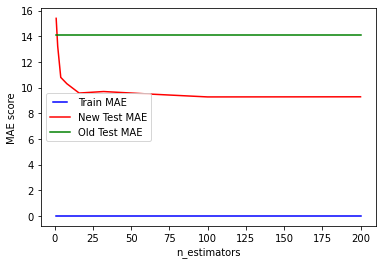

In [21]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

print(n_estimators)
train_results = []
test_results = []
test_results_dt_pred = []

for estimator in n_estimators:
    dt = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)           #main change
    dt.fit(X_train, y_train)
    
    train_results.append(metrics.mean_absolute_error(y_train, train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(metrics.mean_absolute_error(y_test, y_pred))
    test_results_dt_pred.append(metrics.mean_absolute_error(y_test, dt_pred))
    
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label='Train MAE')
line2, = plt.plot(n_estimators, test_results, 'r', label='New Test MAE')
line3, = plt.plot(n_estimators, test_results_dt_pred, 'g', label='Old Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('n_estimators')
plt.show()

In [22]:
model = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)           #main change
model.fit(X_train,y_train)

rf_pred2 = model.predict(X_test)
print('Old Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Old Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Old Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print("")
print('New Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred2))
print('New Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred2))
print('New Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred2)))

Old Mean Absolute Error: 9.302466666666668
Old Mean Squared Error: 239.51440026666666
Old Root Mean Squared Error: 15.47625278504673

New Mean Absolute Error: 9.29652
New Mean Squared Error: 240.2367589
New Root Mean Squared Error: 15.49957286185655


We can observe how the application of new N-estimators is helping the model in getting better results, at least in terms of Mean Absolute Error.

## - Exercici 4
Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna).

### - Linear Regression

In [23]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X, y)
score = clf.score(X, y)
score

0.9954800153018998

In [24]:
lr_pred_int = clf.predict(X)
print(lr_pred_int)

[-1.13090241 23.2220172  87.82471775 ...  5.79488133 89.13805282
 35.42708778]


In [25]:
df_pred_int=pd.DataFrame({'Actual':y, 'Predicted':lr_pred_int})
df_pred_int.head()

,Actual,Predicted
104241,0.0,-1.130902
199676,21.0,23.222017
140199,84.0,87.824718
132814,60.0,61.387993
408697,32.0,22.978002


In [26]:
r_sq3 = clf.score(X, y)
print("R2 with train/test split: ", r_sq1)
print("R2 without it split: ", r_sq3)

R2 with train/test split:  0.9949473147976851
R2 without it split:  0.9954800153018998


### - Decision Tree

In [27]:
regressor = DecisionTreeRegressor(max_depth = 15, random_state=0)
regressor.fit(X,y)
regressor.score(X,y)

0.9960346969728479

In [28]:
dt_pred_int = regressor.predict(X)
dt_pred_int = pd.DataFrame({'Actual':y, 'Predicted':dt_pred_int})
df_pred_int.head()

,Actual,Predicted
104241,0.0,-1.130902
199676,21.0,23.222017
140199,84.0,87.824718
132814,60.0,61.387993
408697,32.0,22.978002


In [29]:
r_sq4 = regressor.score(X,y)
print("R2 with train/test split: ", r_sq2)
print("R2 without split: ", r_sq4)

R2 with train/test split:  0.8411995186678505
R2 without split:  0.9960346969728479


Remarkable difference with intern validation compared to train/test split. It's much higher in the former, but probably due to high overfitting.

### - Random Forest

In [30]:
rf = RandomForestRegressor(n_estimators=30, max_depth=30, random_state=42)
rf.fit(X,y)
rf_pred_int=rf.predict(X)
df_rf_int=pd.DataFrame({'Actual':y, 'Predicted':rf_pred_int})
df_pred_int.head()

,Actual,Predicted
104241,0.0,-1.130902
199676,21.0,23.222017
140199,84.0,87.824718
132814,60.0,61.387993
408697,32.0,22.978002


In [31]:
print('Accuracy with train/test split: ', predictions.mean()/y_test.mean())
print("Accuracy without split: ", rf_pred_int.mean()/y.mean())

Accuracy with train/test split:  0.9679214588020579
Accuracy without split:  0.9993871268072534


Probably due to overfitting, the accuracy obtained with internal validation is higher and very close to 100%.

### - Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció. <br>
Since we already applied all the feature engineering we could for the last exercises, we'll generate results without those applications and compare them to each other. <br>To recap the results <b>with</b> feature engineering we have:

### - Linear Regression with feature engineering
<b>(Dummies + Standarization + PCA)

In [32]:
lr_pred = model.predict(X_test)
pred = pd.DataFrame({'Actual':y_test, 'Prediction': lr_pred, 'Delta':round(model.predict(X_test)-y_test,2)})
pred.sample(5, random_state=42)
print('R2 with feature engineering:', r_sq1)
print('MAE with feature engineering:', round(metrics.mean_absolute_error(y_test, lr_pred),2))
print('MSE with feature engineering:', round(metrics.mean_squared_error(y_test, lr_pred),2))
print('RMSE with feature engineering:', round(np.sqrt(metrics.mean_squared_error(y_test, lr_pred)),2))

R2 with feature engineering: 0.9949473147976851
MAE with feature engineering: 9.3
MSE with feature engineering: 240.24
RMSE with feature engineering: 15.5


### - Linear Regression without feature engineering

In [33]:
delays = pd.read_csv(r'DelayedFlights.csv')
delays.dropna(inplace=True)
delays.drop(['Unnamed: 0','Cancelled','Diverted'], axis=1, inplace=True)
pd.set_option('max_columns', None)
nums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
nums = delays.select_dtypes(include=nums).columns
delays = delays[nums].sample(5000)

#Steps 1 and 2: Import packages and classes, and provide data
yo = delays["ArrDelay"]
Xo= delays.loc[:, delays.columns != 'ArrDelay']

#splitting between test and train
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size = 0.3)

#Step 3: Create a model and fit it
model = LinearRegression().fit(Xo_train, yo_train)

#Step 4: Get results
ro_sq1 = model.score(Xo_test, yo_test)
lro_pred = model.predict(Xo_test)
pred = pd.DataFrame({'Actual':yo_test, 'Prediction': lro_pred, 'Delta':round(model.predict(Xo_test)-yo_test,2)})
print('R2 without feature engineering:', ro_sq1)
print('MAE without feature engineering:', round(metrics.mean_absolute_error(yo_test, lro_pred),2))
print('MSE without feature engineering:', round(metrics.mean_squared_error(yo_test, lro_pred),2))
print('RMSE without feature engineering:', round(np.sqrt(metrics.mean_squared_error(yo_test, lro_pred)),2))

R2 without feature engineering: 1.0
MAE without feature engineering: 0.0
MSE without feature engineering: 0.0
RMSE without feature engineering: 0.0


We can see how this model without feature engineering is giving a perfect accuracy, implying that it has a strong overfitting. 

## - Exercici 6
No utilitzis la variable DepDelay a l’hora de fer prediccions.
<br>Let's compare the results with the variable <b>DepDelay</b> and without it:

### - Linear Regression with DepDelay

In [34]:
from sklearn.preprocessing import StandardScaler

#preparing dataframe
delays = delays[nums].sample(5000)
delays2 = delays.drop(['Year','Month','DayofMonth','DayOfWeek','CarrierDelay', 'WeatherDelay', 
                       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1)

#standarizing dataframe
ss = StandardScaler()
nums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
nums = list(delays2.select_dtypes(include=nums).columns)
nums.remove("ArrDelay")
Xstd = ss.fit_transform(delays2[nums].values)
delays2[nums] = Xstd

#running model with DepDelay included
y = delays2["ArrDelay"]
X = delays2.loc[:, delays2.columns != 'ArrDelay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model = LinearRegression().fit(X_train, y_train)
r_sq1 = model.score(X_test, y_test)
lr_pred = model.predict(X_test)
pred = pd.DataFrame({'Actual':y_test, 'Prediction': lr_pred})
print('R2 with DepDelay:', r_sq1)
print('MAE with DepDelay:', round(metrics.mean_absolute_error(y_test, lr_pred),2))
print('MSE with DepDelay:', round(metrics.mean_squared_error(y_test, lr_pred),2))
print('RMSE with DepDelay:', round(np.sqrt(metrics.mean_squared_error(y_test, lr_pred)),2))
display(X.head())

#running model without DepDelay
delays2 = delays2.drop('DepDelay', axis=1)
y = delays2["ArrDelay"]
X = delays2.loc[:, delays2.columns != 'ArrDelay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model = LinearRegression().fit(X_train, y_train)
r_sq1 = model.score(X_test, y_test)
lr_pred = model.predict(X_test)
pred = pd.DataFrame({'Actual':y_test, 'Prediction': lr_pred})
print('\nR2 without DepDelay:', r_sq1)
print('MAE without DepDelay:', round(metrics.mean_absolute_error(y_test, lr_pred),2))
print('MSE without DepDelay:', round(metrics.mean_squared_error(y_test, lr_pred),2))
print('RMSE without DepDelay:', round(np.sqrt(metrics.mean_squared_error(y_test, lr_pred)),2))

X.head()

R2 with DepDelay: 1.0
MAE with DepDelay: 0.0
MSE with DepDelay: 0.0
RMSE with DepDelay: 0.0


,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
504292,-0.571921,-0.798122,-0.292339,-0.678613,0.821329,-0.390061,-0.225692,-0.225790,0.259624,-0.262727,-0.525354,-0.590721
24638,-0.950536,-1.035522,-0.662539,-1.114462,0.267006,-1.019616,-1.097446,-0.907864,-0.235451,-0.869774,-0.525354,-0.527314
812538,0.356797,0.341399,0.186337,-0.027019,1.059112,-0.935675,-0.821391,-1.011658,-0.119934,-0.944515,-0.210507,0.170158
732364,0.886856,1.065469,1.071372,1.228227,-0.440822,0.407375,0.500771,0.649044,-0.565501,0.583128,-0.367931,-0.780941
685448,-1.179931,-1.379752,-0.855387,-1.410840,-0.396677,-0.306120,-0.094928,-0.166479,0.457654,-0.191632,-0.210507,-0.590721



R2 without DepDelay: 0.11381031095903926
MAE without DepDelay: 37.72
MSE without DepDelay: 4205.75
RMSE without DepDelay: 64.85


,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut
504292,-0.571921,-0.798122,-0.292339,-0.678613,0.821329,-0.390061,-0.225692,-0.225790,-0.262727,-0.525354,-0.590721
24638,-0.950536,-1.035522,-0.662539,-1.114462,0.267006,-1.019616,-1.097446,-0.907864,-0.869774,-0.525354,-0.527314
812538,0.356797,0.341399,0.186337,-0.027019,1.059112,-0.935675,-0.821391,-1.011658,-0.944515,-0.210507,0.170158
732364,0.886856,1.065469,1.071372,1.228227,-0.440822,0.407375,0.500771,0.649044,0.583128,-0.367931,-0.780941
685448,-1.179931,-1.379752,-0.855387,-1.410840,-0.396677,-0.306120,-0.094928,-0.166479,-0.191632,-0.210507,-0.590721


After doing the assessment, we can observe a bit difference between using or refusing to use DepDelay: with it the model is perfect, probably due to high overfitting. Without it the coefficient of determination drops below the 12%, and all the Error indicators increase drastically. We can confirm then that DepDelay is an input very important for the model when it comes to predicting the value of the target variable ArrDelay. 